# Graph showing (ET:Precip ratio vs Groundwater trends) for all sites.

In [2]:
import os
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import rasterio


# Skip next 3 code chunks they are for data download/raster creation

## API to download precipitation data

In [ ]:

base_url = "https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access"
years = range(1996, 2026)

out_dir = "gpcp_data"
os.makedirs(out_dir, exist_ok=True)

for year in years:
    url = f"{base_url}/{year}/"
    r = requests.get(url)
    r.raise_for_status()

    for line in r.text.split():
        if ".nc" in line:
            fname = line.split('"')[1]
            file_url = url + fname
            out_path = os.path.join(out_dir, fname)

            if not os.path.exists(out_path):
                print("Downloading", fname)
                data = requests.get(file_url)
                open(out_path, "wb").write(data.content)

## Inspect Precipitation data

In [ ]:
# Takes 2:40 mins to run

import xarray as xr
import glob

# Read in folders from cyberduck
gpcp_data_dir = "/capstone/aridgw/data/gpcp_data/"

files = sorted(glob.glob(gpcp_data_dir + "*.nc"))
print(len(files), "files found")

# Open them with xarray, combine them
ds = xr.open_mfdataset(files, combine="by_coords")
ds


10623 files found


<xarray.Dataset> Size: 3GB
Dimensions:      (time: 10623, latitude: 180, nv: 2, longitude: 360)
Coordinates:
  * latitude     (latitude) float32 720B -90.0 -89.0 -88.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 1kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time         (time) datetime64[ns] 85kB 1996-10-01 1996-10-02 ... 2025-10-31
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 15MB dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds   (time, longitude, nv) float32 31MB dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds  (time, nv) datetime64[ns] 170kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip       (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/199610/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T16:52:42Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, TOVS > TIROS Operational Vertical Sou...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [2]:
# Check data vairables
ds.data_vars


Data variables:
    lat_bounds   (time, latitude, nv) float32 15MB dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds   (time, longitude, nv) float32 31MB dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds  (time, nv) datetime64[ns] 170kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip       (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

## Compute a multi-year normal (mean) and create raster

In [ ]:
# Takes 2:15 mins to run

# Compute a multi-year normal (mean)
precip_normal = ds["precip"].mean(dim="time")
precip_normal

# Save as a raster (GeoTIFF)
import rioxarray

precip_normal = precip_normal.rio.write_crs("EPSG:4326")
precip_normal.rio.to_raster("gpcp_precip_normal.tif")


NameError: name 'ds' is not defined

# Start here to create plot

## Combining ET and Groundwater data for all sites

In [3]:
# Read in all ET and GW data for all sites

# San Simon Valley
et_gw_merged_san_simon_valley = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_san_simon_valley.csv"
et_gw_merged_san_simon_valley = pd.read_csv(et_gw_merged_san_simon_valley)

# Butler Valley
et_gw_merged_butler_valley = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_butler_valley.csv"
et_gw_merged_butler_valley = pd.read_csv(et_gw_merged_butler_valley)

# McMulllen Valley
et_gw_merged_mcmulllen_valley = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_mcmulllen_valley.csv"
et_gw_merged_mcmulllen_valley = pd.read_csv(et_gw_merged_mcmulllen_valley)

# Hualapai Valley Basin
et_gw_merged_hualapai_valley_basin = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_hualapai_valley_basin.csv"
et_gw_merged_hualapai_valley_basin = pd.read_csv(et_gw_merged_hualapai_valley_basin)

# Southern Willcox Basin
et_gw_merged_southern_willcox_basin = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_southern_willcox_basin.csv"
et_gw_merged_southern_willcox_basin = pd.read_csv(et_gw_merged_southern_willcox_basin)

# Nevada (Amargosa)
et_gw_merged_nevada_amargosa = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_nevada_amargosa.csv"
et_gw_merged_nevada_amargosa = pd.read_csv(et_gw_merged_nevada_amargosa)

# Arizona (Willcox Basin)
et_gw_merged_arizona_willcox_basin = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_arizona_willcox_basin.csv"
et_gw_merged_arizona_willcox_basin = pd.read_csv(et_gw_merged_arizona_willcox_basin)

# Cuyama
et_gw_merged_cuyama = "/capstone/aridgw/data/merged_timeseries_1km/et_gw_merged_cuyama.csv"
et_gw_merged_cuyama = pd.read_csv(et_gw_merged_cuyama)

In [4]:
# Concatenate data
et_gw_merged_all_sites = pd.concat([
    et_gw_merged_san_simon_valley,
    et_gw_merged_butler_valley,
    et_gw_merged_mcmulllen_valley,
    et_gw_merged_hualapai_valley_basin,
    et_gw_merged_southern_willcox_basin,
    et_gw_merged_nevada_amargosa,
    et_gw_merged_arizona_willcox_basin,
    et_gw_merged_cuyama
], ignore_index=True)


## Extract precip values for each well site

In [5]:

et_gw_merged_all_sites = et_gw_merged_all_sites.copy()

# convert longitudes from -180–180 to 0–360
et_gw_merged_all_sites["lon_360"] = np.where(
    et_gw_merged_all_sites["longitude"] < 0,
    et_gw_merged_all_sites["longitude"] + 360,
    et_gw_merged_all_sites["longitude"]
)

with rasterio.open("/capstone/aridgw/data/gpcp_precip_normal.tif") as src:
    coords = list(zip(
        et_gw_merged_all_sites["lon_360"],
        et_gw_merged_all_sites["latitude"]
    ))
    values = [v[0] for v in src.sample(coords)]

et_gw_merged_all_sites["gpcp_precip_normal"] = values


In [6]:
# Make daily avergaes yearly
et_gw_merged_all_sites["gpcp_precip_normal"] = et_gw_merged_all_sites["gpcp_precip_normal"] * 365
et_gw_merged_all_sites.head()

,MEDS_ID,MEDS_ANNUAL_MEDIAN_ROW,YEAR,WaterLevel_m,WaterLevelElev_masl,Title Location,Lat,Lon,tile_id,year,location,latitude,longitude,tile,mean_ET_mm_yr,buffer_radius_m,lon_360,gpcp_precip_normal
0,17,574,2003,67.60464,NaN,San Simon Valley,32.171194,-109.157837,h08v05,2003.0,San Simon Valley,32.171194,-109.157837,h08v05,170.530762,1000.0,250.842163,328.709625
1,17,575,2004,66.72072,NaN,San Simon Valley,32.171194,-109.157837,h08v05,2004.0,San Simon Valley,32.171194,-109.157837,h08v05,230.538467,1000.0,250.842163,328.709625
2,17,576,2005,71.56704,NaN,San Simon Valley,32.171194,-109.157837,h08v05,2005.0,San Simon Valley,32.171194,-109.157837,h08v05,239.988449,1000.0,250.842163,328.709625
3,17,577,2007,67.45224,NaN,San Simon Valley,32.171194,-109.157837,h08v05,2007.0,San Simon Valley,32.171194,-109.157837,h08v05,276.661530,1000.0,250.842163,328.709625
4,17,578,2008,82.02168,NaN,San Simon Valley,32.171194,-109.157837,h08v05,2008.0,San Simon Valley,32.171194,-109.157837,h08v05,278.073059,1000.0,250.842163,328.709625


## Calculate groundwater trend per site and ET/precip ratio per site

In [7]:
# Calculate groundwater trend per site

df = et_gw_merged_all_sites.copy()

def calc_trend(group):
    # drop missing values
    g = group.dropna(subset=["YEAR", "WaterLevel_m"])
    if len(g) < 2:
        return np.nan
    
    # slope (m/year)
    slope = np.polyfit(g["YEAR"], g["WaterLevel_m"], 1)[0]
    return slope

gw_trends = df.groupby("location").apply(calc_trend).reset_index()
gw_trends.columns = ["location", "gw_trend_m_per_yr"]



# Compute ET : Precip ratio per site

climate = df.groupby("location").agg(
    mean_et=("mean_ET_mm_yr", "mean"),
    mean_precip=("gpcp_precip_normal", "mean")
).reset_index()

climate["et_precip_ratio"] = climate["mean_et"] / climate["mean_precip"]

# Merge them
site_summary = gw_trends.merge(climate, on="location")
site_summary



/tmp/ipykernel_435531/1786230832.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gw_trends = df.groupby("location").apply(calc_trend).reset_index()


,location,gw_trend_m_per_yr,mean_et,mean_precip,et_precip_ratio
0,Arizona (Willcox Basin),2.460569,257.231247,325.587097,0.790054
1,Butler Valley,1.909301,162.346309,212.058380,0.765574
2,Cuyama,0.427477,184.115132,354.074188,0.519990
3,Hualapai Valley Basin,1.564896,115.447110,247.652451,0.466166
4,McMulllen Valley,0.428793,91.588407,258.499268,0.354308
5,Nevada (Amargosa),0.281753,64.273913,247.866379,0.259309
6,San Simon Valley,2.353814,249.395189,328.709625,0.758710
7,Southern Willcox Basin,0.449900,173.828178,333.326355,0.521495


## Visualize data for all 8 sites

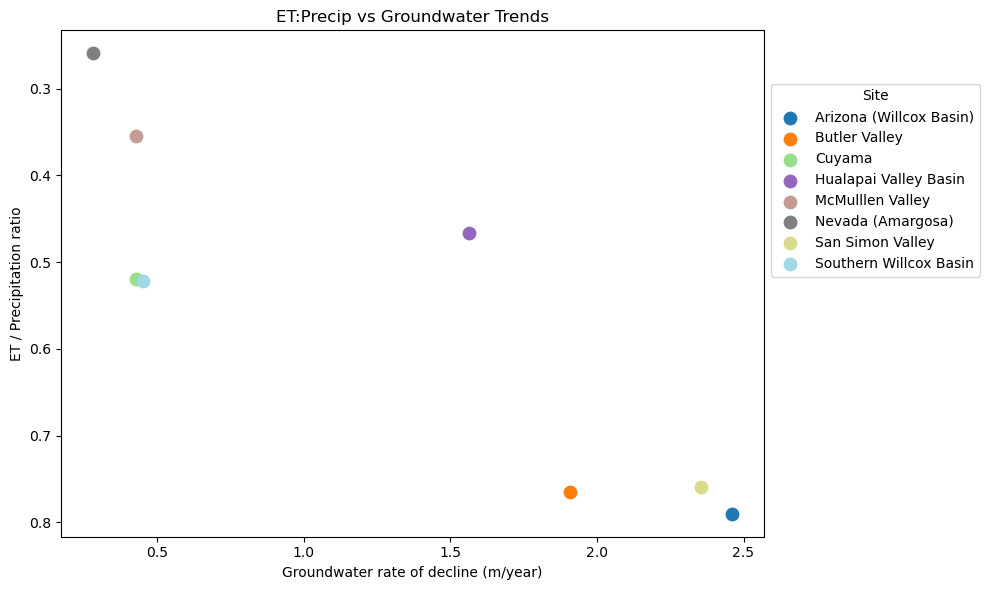

In [8]:
# Get unique sites
sites = site_summary["location"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(sites)))  # assign a color for each site

plt.figure(figsize=(10, 6))

# Scatter points colored by site
for site, color in zip(sites, colors):
    subset = site_summary[site_summary["location"] == site]
    plt.scatter(subset["gw_trend_m_per_yr"],
                subset["et_precip_ratio"],
                label=site,
                color=color,
                s=80)

# # Label each point with its site
# for i, row in site_summary.iterrows():
#     plt.text(row["gw_trend_m_per_yr"] + 0.05,
#              row["et_precip_ratio"],
#              row["location"],   # updated column name
#              fontsize=9)

plt.xlabel("Groundwater rate of decline (m/year)")
plt.ylabel("ET / Precipitation ratio")
plt.title("ET:Precip vs Groundwater Trends")
plt.legend(title="Site", loc='lower left', bbox_to_anchor=(1, .5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


